In [4]:
import re 
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras import Model

import tensorflow as tf
from keras import layers
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv("/Users/jianhongxu/python_project/twitter_dataset/cleaned_tweet_85k.csv")
df.head()

,class,tweet
0,ADHD,a game that features difficult gameplay and w...
1,ADHD,poor baby cant handle black people existing n...
2,ADHD,so countries that already are developed shoul...
3,ADHD,asking if someone is being serious about some...
4,ADHD,off label unproven treatment there were so m...


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jianhongxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def remove_number_stopwords(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    text = num.sub(r'',text)
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text
df['clean_tweet'] = df['tweet'].apply(remove_number_stopwords)

In [8]:
df.head(10)

,class,tweet,clean_tweet
0,ADHD,a game that features difficult gameplay and w...,game features difficult gameplay people genuin...
1,ADHD,poor baby cant handle black people existing n...,poor baby cant handle black people existing ne...
2,ADHD,so countries that already are developed shoul...,countries already developed conscious emission...
3,ADHD,asking if someone is being serious about some...,asking someone serious something trying explai...
4,ADHD,off label unproven treatment there were so m...,label unproven treatment many studies done ivm...
5,ADHD,alaska isnt a country and doesnt count as a u...,alaska isnt country doesnt count us state anym...
6,ADHD,theres no data for lactose intolerance from c...,theres data lactose intolerance canada wha
7,ADHD,wow all businesses would have died if they ha...,wow businesses would died pay workers fairly c...
8,ADHD,if they are using endurance for seconds that ...,using endurance seconds means arent anything p...
9,ADHD,oh no pallet in the map what will anyone do,oh pallet map anyone


In [9]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['labels'] = labelEncoder.fit_transform(df['class'])

df[['class','labels']].drop_duplicates(keep='first')

,class,labels
0,ADHD,0
28876,DEPRESSION,2
57526,BIPOLAR,1


In [13]:
train_text, test_text, train_label, test_label = train_test_split(df['clean_tweet'],df['labels'], 
                                                                  test_size=0.2,random_state=42)

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_tweet'])

word_index = tokenizer.word_index
print(word_index)
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)
max_length = df['clean_tweet'].apply(lambda x:len(str(x).split())).max()
print(max_length)

{'httpurl': 1, 'im': 2, 'like': 3, 'people': 4, 'dont': 5, 'amp': 6, 'one': 7, 'get': 8, 'know': 9, 'think': 10, 'time': 11, 'would': 12, 'ive': 13, 'even': 14, 'good': 15, 'really': 16, 'want': 17, 'thats': 18, 'work': 19, 'still': 20, 'make': 21, 'need': 22, 'see': 23, 'also': 24, 'going': 25, 'right': 26, 'much': 27, 'cant': 28, 'go': 29, 'book': 30, 'got': 31, 'love': 32, 'way': 33, 'day': 34, 'youre': 35, 'never': 36, 'feel': 37, 'back': 38, 'things': 39, 'well': 40, 'life': 41, 'could': 42, 'years': 43, 'today': 44, 'didnt': 45, 'new': 46, 'say': 47, 'someone': 48, 'first': 49, 'something': 50, 'said': 51, 'always': 52, 'lol': 53, 'take': 54, 'us': 55, 'thing': 56, 'actually': 57, 'better': 58, 'world': 59, 'doesnt': 60, 'year': 61, 'many': 62, 'adhd': 63, 'read': 64, 'every': 65, 'last': 66, 'sure': 67, 'hes': 68, 'lot': 69, 'trying': 70, 'look': 71, 'made': 72, 'person': 73, 'best': 74, 'help': 75, 'find': 76, 'shit': 77, 'ill': 78, 'getting': 79, 'man': 80, 'ever': 81, 'though

In [15]:
train_text = tokenizer.texts_to_sequences(train_text)
test_text = tokenizer.texts_to_sequences(test_text)

train_text = pad_sequences(train_text, maxlen=max_length)
test_text = pad_sequences(test_text, maxlen=max_length)

train_text.shape,test_text.shape

((68306, 56), (17077, 56))

In [16]:
train_label = pd.get_dummies(train_label, dtype=int)
test_label = pd.get_dummies(test_label, dtype=int)

train_label,test_label

(       0  1  2
 4517   1  0  0
 35528  0  0  1
 71093  0  1  0
 49845  0  0  1
 81595  0  1  0
 ...   .. .. ..
 6265   1  0  0
 54886  0  0  1
 76820  0  1  0
 860    1  0  0
 15795  1  0  0
 
 [68306 rows x 3 columns],
        0  1  2
 9845   1  0  0
 35555  0  0  1
 55819  0  0  1
 7024   1  0  0
 62189  0  1  0
 ...   .. .. ..
 5359   1  0  0
 11380  1  0  0
 28083  1  0  0
 58497  0  1  0
 70408  0  1  0
 
 [17077 rows x 3 columns])

In [17]:
GLOVE_PATH = '/Users/jianhongxu/python_project/twitter_dataset/glove.6B.100d.txt'

embeddings_index = {}

f = open(GLOVE_PATH, encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:], dtype='float32')
    embeddings_index[word] =coefs
f.close()

print(f'Found {len(embeddings_index)} word vectors.')

EMBEDDING_DIM = 100
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [18]:
model = Sequential()
model.add(layers.Input(shape=(train_text.shape[1],)))
model.add(layers.Embedding(
    input_dim=vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix],input_length=max_length))
model.add(layers.Dropout(0.3))
model.add(layers.Bidirectional(layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='swish'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/jianhongxu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 56, 100)        │     5,307,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,343,327 (20.38 MB)

 Trainable params: 5,343,327 (20.38 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_text, train_label, epochs=10, verbose=1, 
                    validation_data=(test_text,test_label))

loss,accuracy = model.evaluate(train_text, train_label, verbose=0)
print(f'Training Accuracy: {accuracy:.4f}')
loss, accuracy = model.evaluate(test_text,test_label,verbose=0)
print(f"Testing Accuracy: {accuracy:.4f}")

Epoch 1/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 203s 93ms/step - accuracy: 0.4746 - loss: 1.0093 - val_accuracy: 0.6415 - val_loss: 0.7722
Epoch 2/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 204s 95ms/step - accuracy: 0.6565 - loss: 0.7573 - val_accuracy: 0.6953 - val_loss: 0.6736
Epoch 3/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 183s 86ms/step - accuracy: 0.7275 - loss: 0.6323 - val_accuracy: 0.7139 - val_loss: 0.6419
Epoch 4/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 181s 85ms/step - accuracy: 0.7641 - loss: 0.5546 - val_accuracy: 0.7212 - val_loss: 0.6375
Epoch 5/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 181s 75ms/step - accuracy: 0.7976 - loss: 0.4917 - val_accuracy: 0.7212 - val_loss: 0.6466
Epoch 6/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 195s 72ms/step - accuracy: 0.8152 - loss: 0.4511 - val_accuracy: 0.7220 - val_loss: 0.6732
Epoch 7/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 146s 68ms/step - accuracy: 0.8356 - loss: 0.4098 - val_accuracy: 0.7230 - val_loss: 0.6893
Epoch 8/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 163s 77ms/step - accuracy: 

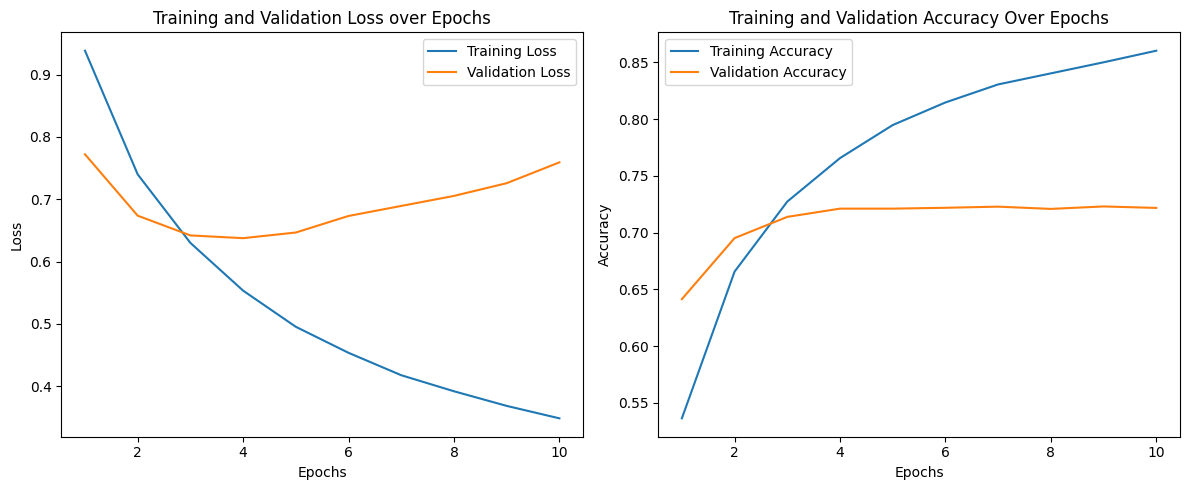

In [20]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, loss, label='Training Loss')
plt.plot(x, val_loss, label ='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, acc, label='Training Accuracy')
plt.plot(x, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


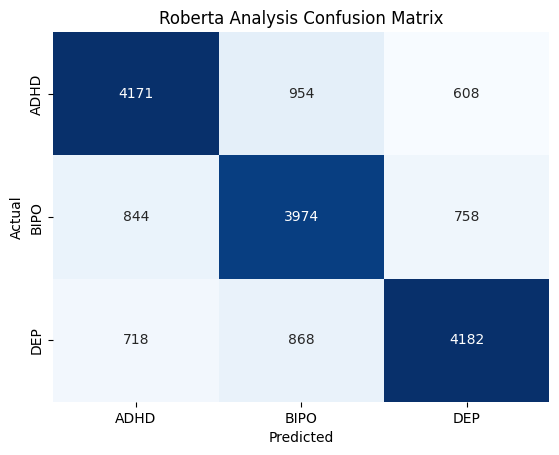

              precision    recall  f1-score   support

        ADHD       0.73      0.73      0.73      5733
     BIPOLAR       0.69      0.71      0.70      5576
  DEPRESSION       0.75      0.73      0.74      5768

    accuracy                           0.72     17077
   macro avg       0.72      0.72      0.72     17077
weighted avg       0.72      0.72      0.72     17077



In [21]:
predict = model.predict(test_text)
predict = np.argmax(predict,axis=1)
predict = np.array(predict)

lables = test_label.idxmax(axis=1)

conf_matrix = confusion_matrix(lables, predict)
labels=["ADHD", "BIPO", "DEP"]
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Roberta Analysis Confusion Matrix')
plt.show()

print(classification_report(lables, predict, target_names=["ADHD", "BIPOLAR", "DEPRESSION"]))